In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/users-of-a-social-network-who-bought-an-suv/Social_Network_Ads.csv


In [2]:
'''
Logistic Regression
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.
In this notebook i am training a model using Logestic Regression Alogorithm. the data in this model is taken from social networking site. the data contains age and salary of person .we will pridict for a car manufacture company who is going to launch a new model of car .we will take the salary and age as input.
our model will show them that who can buy the new model of their car on basis of their salary and age. we will mark '0' as NO(means this person cannot buy) and 1 as YES (mean this person can buy the car).
So the company can directly contact the person in yes category ,so in future if needed customer can buy the car in cash,emi or the company can provide Bank Loan to them for purchase
'''

"\nLogistic Regression\nIn statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.\nIn this notebook i am training a model using Logestic Regression Alogorithm. the data in this model is taken from social networking site. the data contains age and salary of person .we will pridict for a car manufacture company who is going to launch a new model of car .we will take the salary and age as input.\nour model will show them that who can buy the new model of their car on basis of their salary and age. we will mark '0' as NO(means this person cannot buy) and 1 as YES (mean this person can buy the car).\nSo the company can directly contact

In [3]:
#importing the data set 
people_data= pd.read_csv("../input/users-of-a-social-network-who-bought-an-suv/Social_Network_Ads.csv")
people_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,16804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
#now spliting our data  for input and output
#i will take the Age and Estimated Salary columns for the input
input_x= people_data.iloc[:,[2,3]].values
#now taking the purchased column as output. we can see that purchased columns contain data as binary data(0,1)
#where 0 represent "NO"-it means they donot have car, and 1 represent "YES" -it means they have car
output_y=people_data.iloc[:,4].values
#now spliting data into Traning Data and Testing Data
training_x,testing_x,training_y,testing_y=train_test_split(input_x,output_y,test_size=0.3,random_state=0)
#now i am doing feature scaling of data because if we see in our dataset there is a hiuge difference in data of both column,if we compare the both column
#with help of Standard scaler we will bring the data into a range of(-2,2) so we can get get a good prediction
std_scaler=StandardScaler()
training_x=std_scaler.fit_transform(training_x)
testing_x=std_scaler.fit_transform(testing_x)
#now we will build our model using Logestic Regression 
lr=LogisticRegression(random_state=0)
lr.fit(training_x,training_y)
#Now pridicting our model
predict_y=lr.predict(testing_x)
predict_y
#creating a confusion matrix
con_matrix=confusion_matrix(testing_y,predict_y)
con_matrix
       

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[74,  5],
       [ 9, 32]])

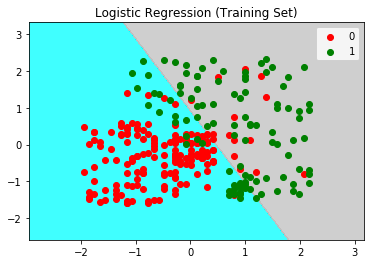

In [5]:
# Now i will plot our Model for visualization using matplotlib
# i will plot in two section 1-traing data ,2-testing data
#**********************
#traing data visualization
from matplotlib.colors import ListedColormap
x_set,y_set=training_x,training_y
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('aqua','silver')))
plt.xlim=(x1.min(),x1.max())
plt.ylim=(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training Set)')   
plt.xlabel=('Age')
plt.ylabel=('Estimated Salary') 
plt.legend()
plt.show()  

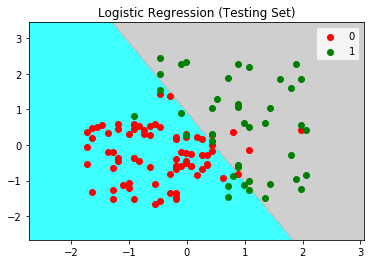

In [6]:
#testing data visualization
from matplotlib.colors import ListedColormap
x_set,y_set=testing_x,testing_y
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('aqua','silver')))
plt.xlim=(x1.min(),x1.max())
plt.ylim=(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Testing Set)')   
plt.xlabel=('Age')
plt.ylabel=('Estimated Salary') 
plt.legend()
plt.show() 